<a href="https://colab.research.google.com/github/Mgobeaalcoba/Inferential_statistics_with_python/blob/main/Prueba_de_Hipotesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Ejemplo de hipotesis: En los paises frios la gente vive más. Si al analizar los casos se me concentran en la zona central de mi distribución y me muestran una alta esperanza de vida superior a la de los paises calidos entonces podrá encontrar significancia estadistica en mi H0 o hipotesis nula. Si nuestra hipotesis nula cae en area de rechazo entonces podremos recurrir a una hipotesis alternativa o H1

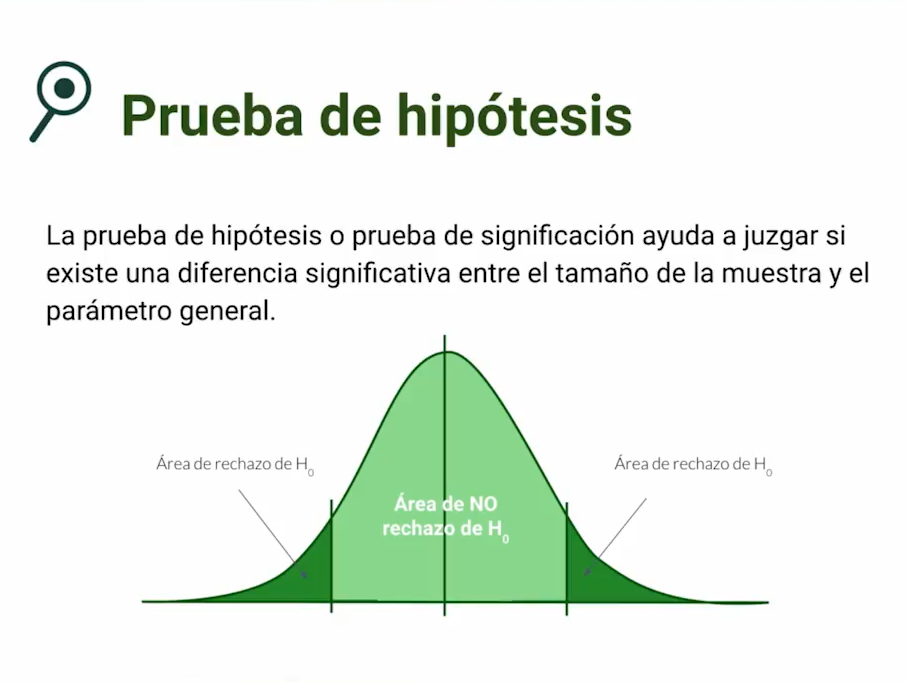

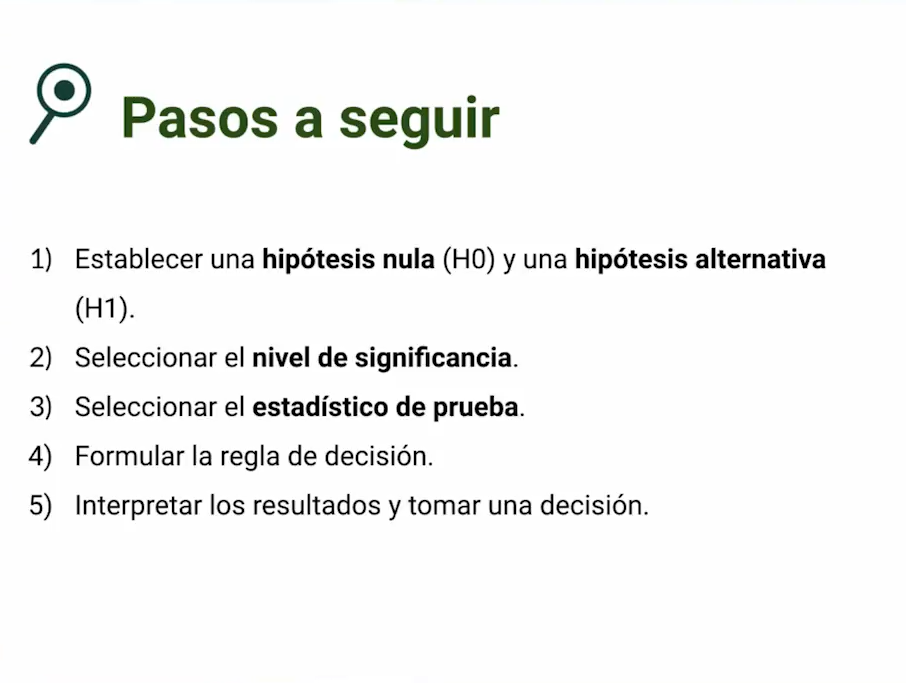

#### Las hipotesis nulas deben ser siempre que no existe diferencia de comportamiento por una variable. Luego si vemos que efectivamente existe tal diferencia entonces plantearemos nuestra hipotesis alternativa o H1

### Tipos de pruebas de hipotesis:

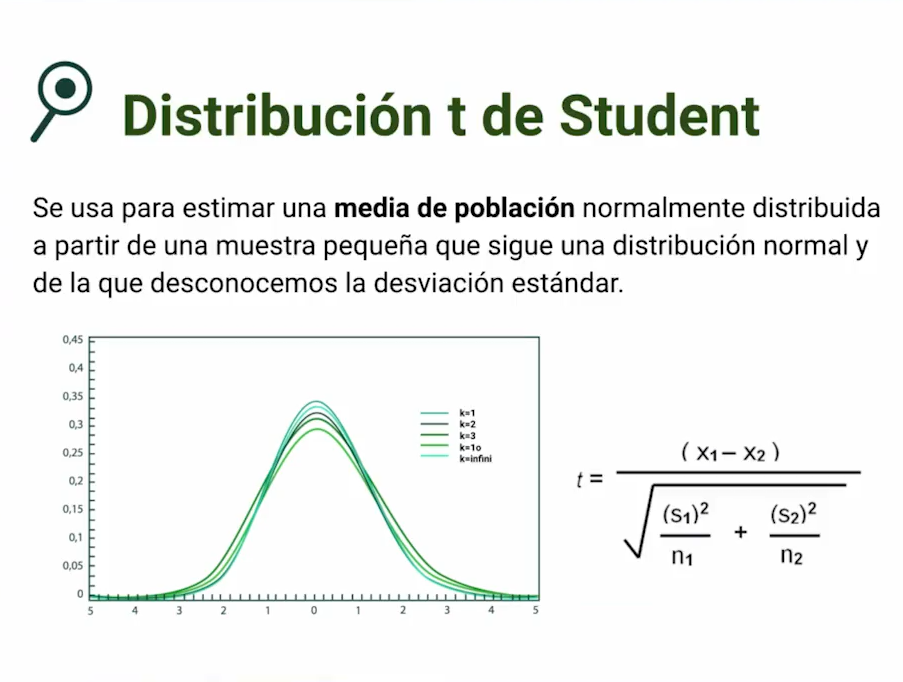

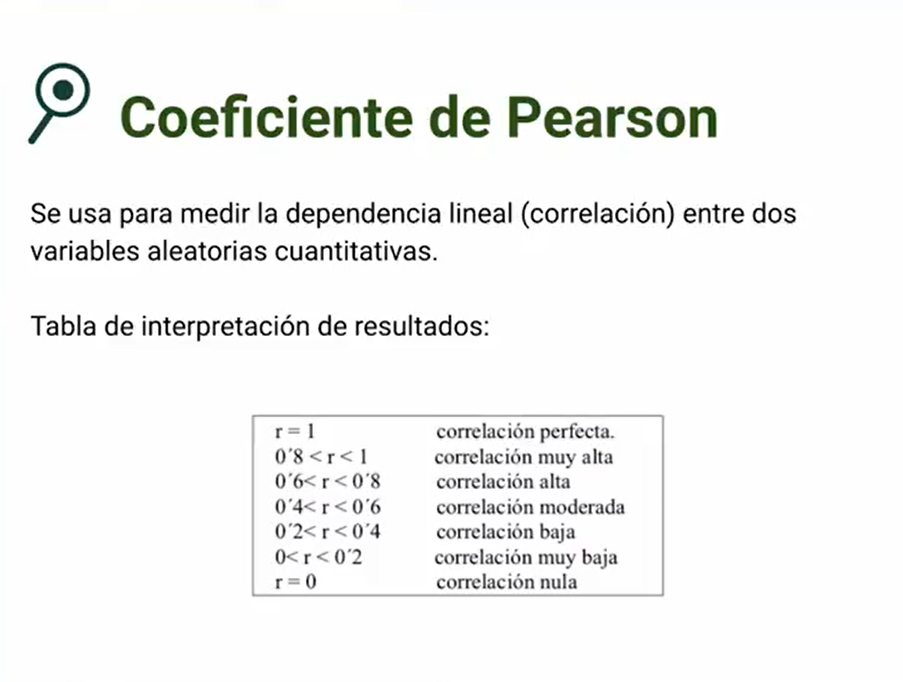

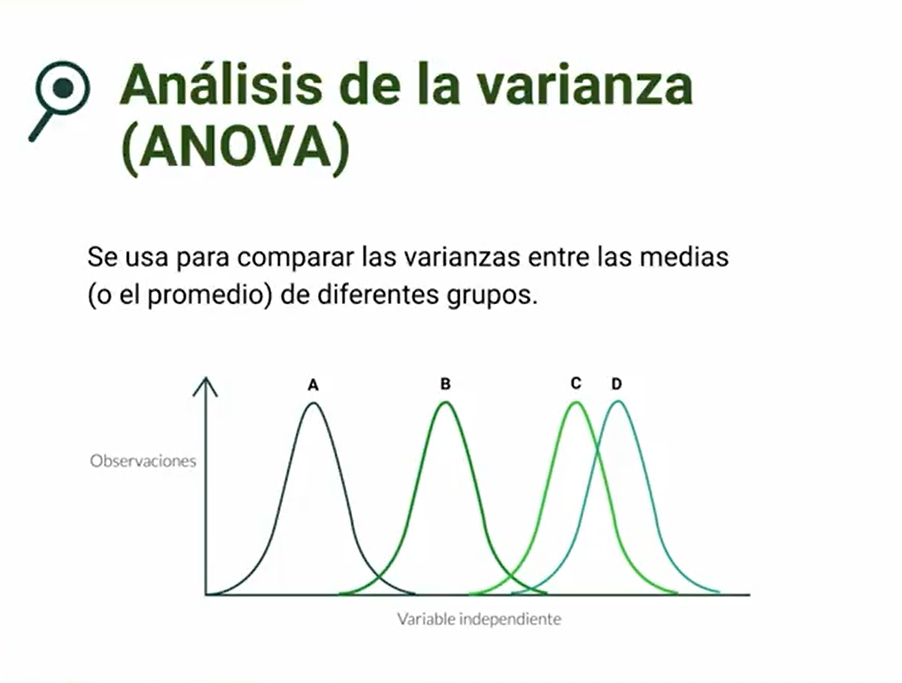

### Tipos de errores a evitar al interpretar nuestra prueba de hipotesis

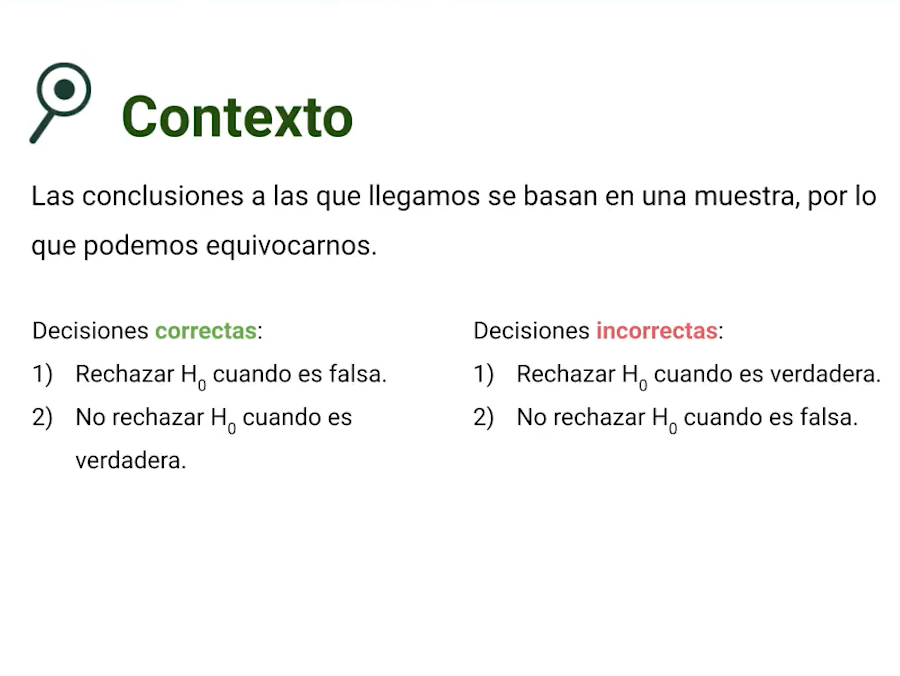

#### Dicho en forma de cuadro:
1. Error de tipo 1 o error Alpha: Cuando rechazamos la hipotesis nula al ser verdadera-
2. Error de tipo 2 o error Beta: Cuando NO rechazamos la hipotesis nula al ser falsa.

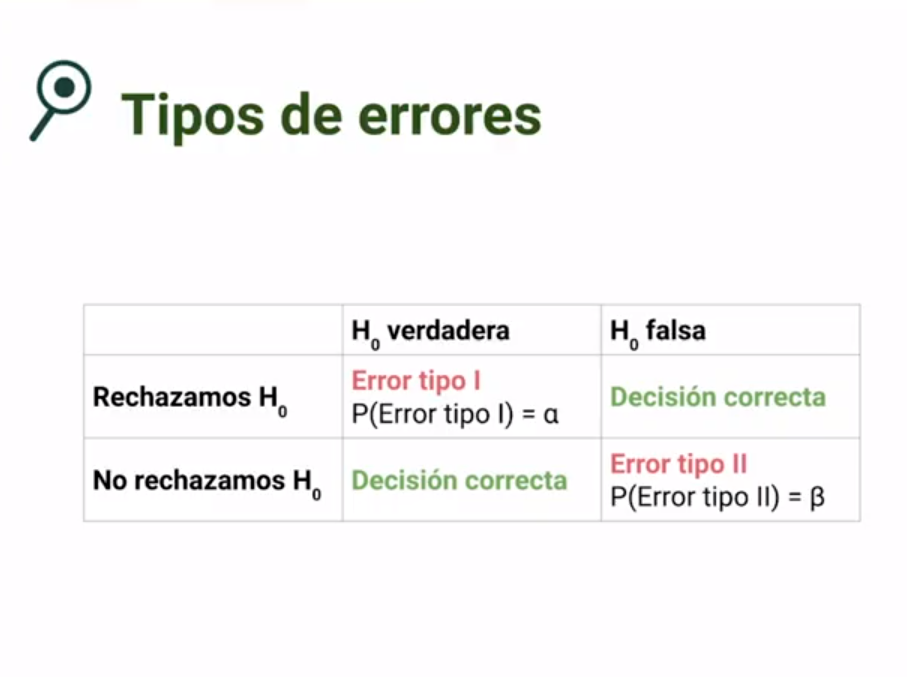

### Ejemplos de ambos errores para una experimentación con medicamentos:

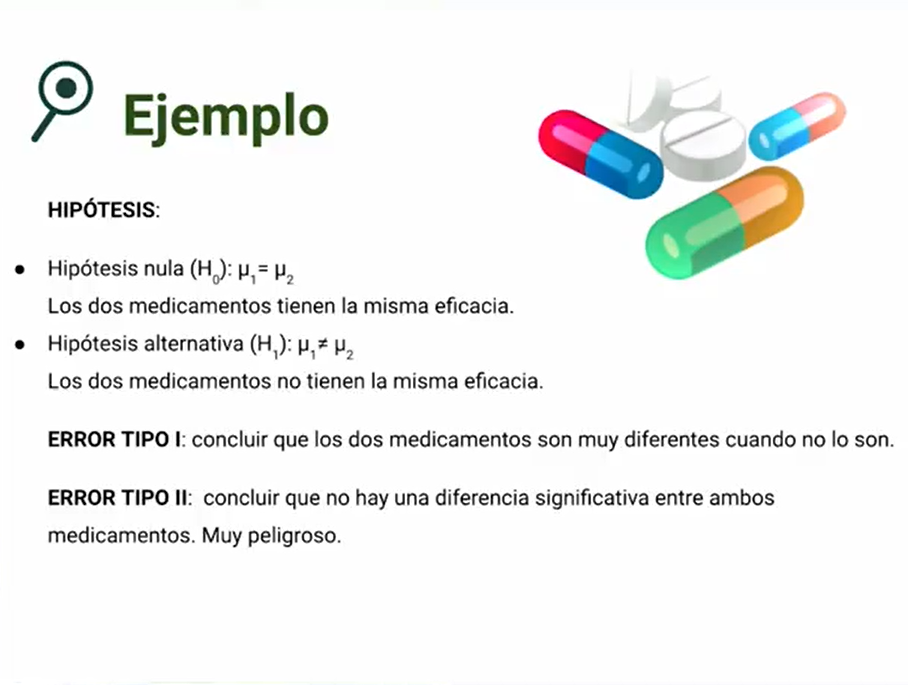

El error de tipo 1 es un error de omisión dado que se comprobó la hipotesis nula pero no la escuchamos. En el error de tipo 2 los efectos pueden ser muy graves, especialmente en medicina. Y se trata de concluir que no hay diferencia significativa entre ambos medicamentos cuando si lo hay. Se trata de tomar una decisión incorrecta el error de tipo 2.

In [1]:
# Vayamos ahora a probar las pruebas de hipotesis en Python:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as st
from scipy.stats import f_oneway, ttest_ind

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
iris = pd.read_csv(url, names = names)
iris.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#### Hipotesis Nula Inicial: La distribución del largo del sépalo va a ser muy similar a la distribución del ancho del sepalo. Verifiquemosla haciendo la prueba de t de Student

### Tipos de prueba:

#### Primero debemos calcular nuestro Estandar Error con la siguiente formula:

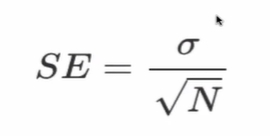

In [7]:
# 1) Estandar Error como primer paso para calcular la t de Student

se_length = iris.std()['sepal-length']/np.sqrt(10) # Desviación Standar de nuestra columna dividido la raiz cuadrada del tamaño de nuestra muestra. Por ejemplo 10
se_width = iris.std()['sepal-width']/np.sqrt(10)
print(f"se_length: {se_length}")
print(f"se_width: {se_width}")

se_length: 0.2618575017646526
se_width: 0.13711456043966944


<ipython-input-7-72d9ad647507>:3: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  se_length = iris.std()['sepal-length']/np.sqrt(10) # Desviación Standar de nuestra columna dividido la raiz cuadrada del tamaño de nuestra muestra. Por ejemplo 10
<ipython-input-7-72d9ad647507>:4: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  se_width = iris.std()['sepal-width']/np.sqrt(10)


In [8]:
## Adaptamos el calculo a la nueva version de Pandas

se_length = iris['sepal-length'].std()/np.sqrt(10) # Desviación Standar de nuestra columna dividido la raiz cuadrada del tamaño de nuestra muestra. Por ejemplo 10
se_width = iris['sepal-width'].std()/np.sqrt(10)
print(f"se_length: {se_length}")
print(f"se_width: {se_width}")

se_length: 0.2618575017646526
se_width: 0.13711456043966944


### Ahora calcularemos el Desviación del Error Estandar o Standar Error Desviation

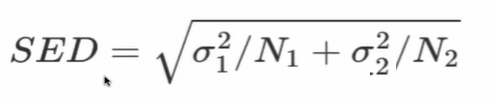![image.png]()


In [6]:
sed = np.sqrt((se_length**2)+(se_width**2))
sed

0.2955837511010861

### Ahora si estamos listos para calcular el t de Student:

#### Formula del t de Student:

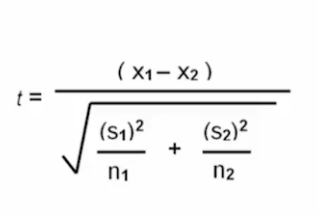

#### Otra formula para calcular t de Student es:
#### En realidad son equivalentes solo que en esta ultima el denominador está resumido como SED que es lo que calculamos arriba.

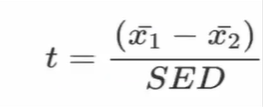

In [9]:
t_stat_num = iris['sepal-length'].mean() - iris['sepal-width'].mean()
t_stat_denom = sed
t_stat = t_stat_num / t_stat_denom
t_stat

9.436693738890318

In [10]:
# Calculamos el valor "p" o pvalue
p = ttest_ind(iris['sepal-length'], iris['sepal-width'])
p

TtestResult(statistic=36.548157693982006, pvalue=3.987838114848222e-112, df=298.0)

### Tenemos entonces:
1. Nuestro valor de t = 9,44
2. Nuestro estadistico = 36,55
3. Nuestro pvalue = 3.98e-112 (Valor muy pero muy pequeño)

Conclusión en este caso:

1. El valor de "t" es mayor que nuestro valor crítico o pvalue (9,44 > 3.91e-112) por lo qué estamos rechazando nuestra hipotesis nula inicial que sostenía que la distribución del largo del sépalo iba a ser muy similar a la distribución del ancho del sepalo.

2. Si el valor "t" hubiera sido menor que el pvalue entonces hubieramos aceptado nuestra hipotesis nula.

3. Entonces surge la H1 o hipotesis alternativa que sostiene que el largo del sépalo es distinto del ancho del sépalo.

### Vayamos ahora a probar hipotesis mediante el coeficiente de pearson y el ANOVA: